In [2]:
!pip install keras

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install keras-preprocessing


In [5]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [6]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [7]:
TRAIN_DIR = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\images\train"
TEST_DIR = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\images\test"

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)

                                                   image     label
0      C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
1      C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
2      C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
3      C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
4      C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
...                                                  ...       ...
28816  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
28817  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
28818  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
28819  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
28820  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
1     C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
2     C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
3     C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
4     C:\Users\deeks\OneDrive\Documents\Face_Emotion...     angry
...                                                 ...       ...
7061  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
7062  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
7063  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
7064  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise
7065  C:\Users\deeks\OneDrive\Documents\Face_Emotion...  surprise

[7066 rows x 2 columns]
0       C:\Users\deeks\OneDrive\Documents\Face_Emotion...
1       C:\Users\deeks\OneDrive\Documents\Face_Emotion...
2       C:\Users\deeks\OneDrive\Documents\Face_Emotion...
3       C

In [13]:
!pip install ipywidgets --upgrade
!pip install jupyterlab --upgrade
!pip install tqdm --upgrade


In [14]:
from tqdm import tqdm

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [16]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install ipywidgets --upgrade
!pip install tqdm --upgrade


In [18]:
!pip install ipywidgets --upgrade
!pip install tqdm --upgrade
!pip install jupyterlab --upgrade



In [19]:
!pip install pillow

In [20]:
train_features = extract_features(train['image'])

  0%|                                                                   | 0/28821 [00:00<?, ?it/s]C:\Users\deeks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|█████████████████████████████████████████████████████| 28821/28821 [00:10<00:00, 2669.01it/s]


In [21]:
test_features = extract_features(test['image'])

100%|███████████████████████████████████████████████████████| 7066/7066 [00:02<00:00, 2839.36it/s]


In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
!pip install scikit-learn

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [28]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\deeks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']  # <- put it inside a list
)


In [30]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 616ms/step - accuracy: 0.2425 - loss: 1.8256 - val_accuracy: 0.2583 - val_loss: 1.8182
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 130s 577ms/step - accuracy: 0.2509 - loss: 1.8011 - val_accuracy: 0.2893 - val_loss: 1.7520
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 132s 586ms/step - accuracy: 0.2969 - loss: 1.7125 - val_accuracy: 0.3409 - val_loss: 1.6570
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 130s 577ms/step - accuracy: 0.3692 - loss: 1.5924 - val_accuracy: 0.4454 - val_loss: 1.4457
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 136s 602ms/step - accuracy: 0.4172 - loss: 1.4917 - val_accuracy: 0.4699 - val_loss: 1.3761
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 133s 589ms/step - accuracy: 0.4489 - loss: 1.4353 - val_accuracy: 0.5003 - val_loss: 1.3044
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 132s 583ms/step - accuracy: 0.4658 - loss: 1.3829 - val_accuracy: 0.5102 - val_loss: 1.2569
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 132s 584ms/step - accuracy: 

In [38]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [39]:
from keras.models import model_from_json

In [2]:
pip uninstall tensorflow keras keras-nightly keras-preprocessing tensorflow-intel -y


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: tensorflow-intel 2.17.0
Uninstalling tensorflow-intel-2.17.0:
  Successfully uninstalled tensorflow-intel-2.17.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [4]:
pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached google_auth-2.43.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached google_auth_oauthlib-1.2.3-py3-none-any.whl.metadata (3.1 kB)
  Using cached google_auth-2.41.1-py2.py3-none-any.whl.metadata (6.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached google_auth_oauthlib-1.2.3-py3-none-any.whl (19 kB)
Using cached google_auth-2.41.1-py2.py3-none-any.whl (221 kB)

   ---------------------------------------- 0/5 [google-auth]

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\deeks\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\google\\oauth2\\_credentials_async.py'
Consider using the `--user` option or check the permissions.



In [1]:
from tensorflow.keras.models import model_from_json

with open("facialemotionmodel.json", "r") as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

print("✅ Model Loaded Successfully!")





✅ Model Loaded Successfully!


In [2]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [3]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [6]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np


In [8]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\sad\42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 222ms/step
model prediction is  sad


In [10]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 11.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.8 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- --

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 32ms/step
model prediction is  sad


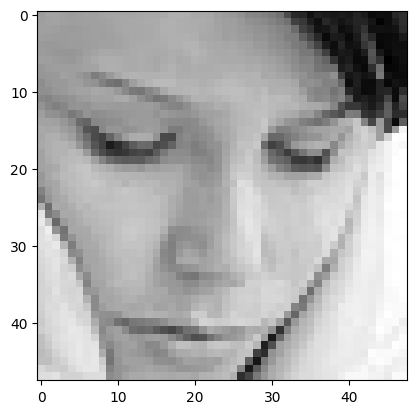

In [13]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\sad\42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

1/1 [==============================] - 0s 44ms/step
model prediction is  sad


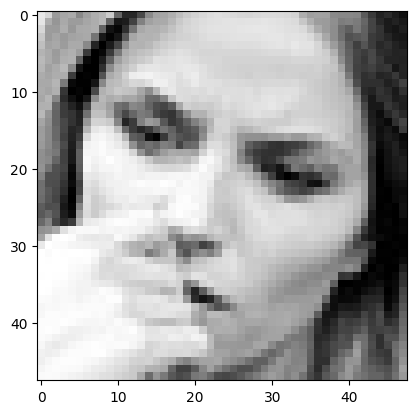

In [17]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\fear\2.jpg"
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 41ms/step
model prediction is  disgust


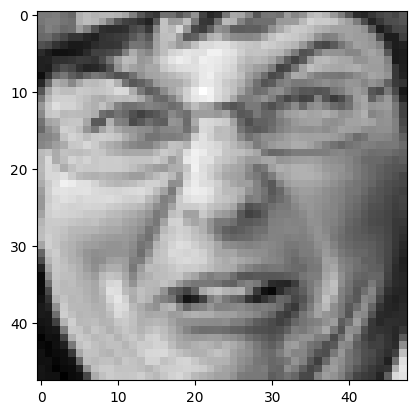

In [18]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\disgust\299.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 41ms/step
model prediction is  happy


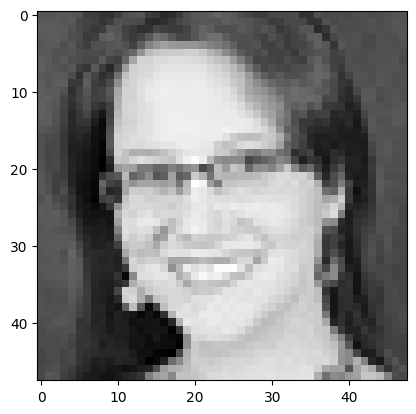

In [19]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\happy\7.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 45ms/step
model prediction is  surprise


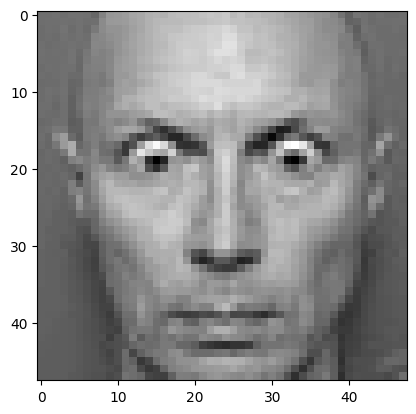

In [20]:
image = r"C:\Users\deeks\OneDrive\Documents\Face_Emotion_Recognition\archive\images\train\surprise\15.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')